Enter the number of curves you aim to plot: 1, 2... N: 2
Enter the value of T in °C: 25
Enter the value of solar irradiance in °W/m2: 1000
Enter the value of T in °C: 15
Enter the value of solar irradiance in °W/m2: 200


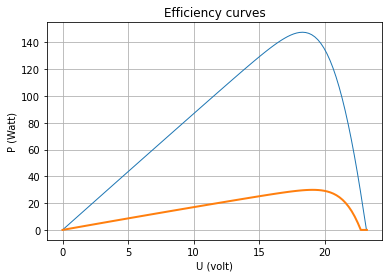

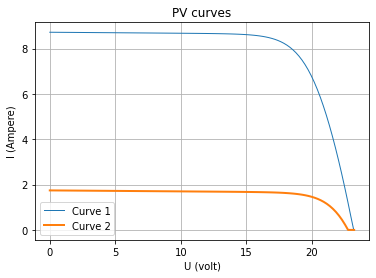

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


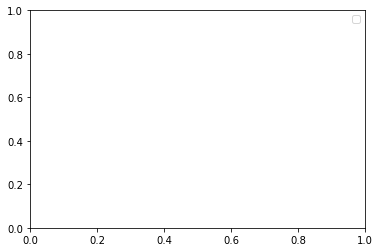

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Characterization Of Photovoltaic Panel Using Single Diode Model
it = int(input('Enter the number of curves you aim to plot: 1, 2... N: '))

for N in range(1, it + 1):
    # PV Module DATA
    T = float(input('Enter the value of T in °C: '))
    G = float(input('Enter the value of solar irradiance in °W/m2: '))

    Isc_r = 8.73
    Voc_r = 23.19
    Vmpp = 18.36
    Impp = 8.17
    Pmpp = 150

    ai = 0.037 / 100
    av = -0.34 / 100
    Ns = 36
    n = 1.3

    Vm = Vmpp
    Im = Impp
    Pm = Pmpp

    # Internal parameters
    Gr = 1000
    T = T + 273.6
    Tr = 25 + 273.6
    dT = T - Tr
    Isc = Isc_r + ai * dT
    Voc = Voc_r + av * dT
    q = 1.60217646e-19
    K = 1.3806503e-23
    Vt = Ns * n * K * T / q
    Eg = 1.12
    Iph = Isc * (G / Gr)
    Iss = Isc / (np.exp(Voc / Vt) - 1)
    Is = Iss * ((T / Tr) ** 3) * np.exp(((q * Eg) / (n * K)) * ((1 / Tr) - (1 / T)))
    Rs = 0.2
    Rp = 230

    I = Iph
    V = np.arange(0, Voc + 0.01, Voc / 100)
    Ipv = np.zeros_like(V)

    for n1 in range(len(V)):
        for n2 in range(20):
            Vd = (V[n1] + Rs * I)
            Id = Is * (np.exp(Vd / Vt) - 1)
            Ip = Vd / Rp
            f = Iph - I - Id - Ip
            df = -1 - (Is * Rs / Vt) * np.exp(Vd / Vt) - (Rs / Rp)
            I = I - f / df

        if I < 0:
            I = 0
        Ipv[n1] = I

    P = Ipv * V

    # Plotting
    plt.figure(1)
    plt.plot(V, Ipv, label=f'Curve {N}', linewidth=N)

    plt.ylabel('I (Ampere)')
    plt.xlabel('U (volt)')
    plt.title('PV curves')
    plt.grid(True)

    plt.figure(2)
    plt.plot(V, P, label=f'Curve {N}', linewidth=N)

    plt.ylabel('P (Watt)')
    plt.xlabel('U (volt)')
    plt.title('Efficiency curves')
    plt.grid(True)

plt.figure(1)
plt.legend()
plt.show()

plt.figure(2)
plt.legend()
plt.show()